# ELG7186 - fall 2022 - Assignment 1
## Due: <strong>Wednesday Oct. 12<sup>th</sup> 2022 -- 11:59pm</strong>

The purpose of this assignment is to gain some experience working with the tools you will use throughout the course. You will learn:
- The basics of data loading and preparation
- Classification using the k-NN algorithm
- Classification using a Support Vector Machine (SVM)
- Calculation of metrics to assess the performance of your model

### Submission Details
Submit your Jupyter notebook .ipynb file using Brightspace. Do not include any other files or images as they will not be reviewed.
<p>
<strong>Make certain that you run all the cells in the notebook you will submit</strong> or you will loose marks.
</p>
<ul>
<li>You can submit multiple times, but only the most recent submission will be saved</li>
<li>Do not wait until the last minute to submit in case you have an unexpected issue</li>
<li>Review the late policy in the syllabus</li>
<li><strong>You must submit your own work</strong> and abide by the University of Ottawa policy on plagiarism and fraud</li>
</ul>


## Part 0. Dataset Preparation
To complete the assignment you will need to download the Cifar10 dataset and devise an appropriate training set split. You may acquire the dataset using the method of your choice. Note that some sources e.g. sklearn have reduced the samples to only 1797 (this could negatively affect your results). If you use the full dataset, you are free to sample from the dataset to reduce the overal training samples. The overall accuracy is less important than your  observations and comparisons. For example classifying the full 10,000 test images might take approximately 15 minutes using k-NN.

In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Divide the raw data into appropriate training and test sets for both the images and corresponding labels for use with the subsequent parts of the assignment.</li>
<li>Visualize five samples of each class by plotting a grid using the matplotlib library.</li>
</ul>


In [1]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import numpy as np

In [2]:
from keras.utils import np_utils

In [3]:
# Prepare your dataset here and display samples here.

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
train_x=X_train.astype('float32')
test_X=X_test.astype('float32')
 
train_X=train_x/255.0
test_X=test_X/255.0

In [6]:
train_Y=np_utils.to_categorical(y_train)
test_Y=np_utils.to_categorical(y_test)
 
num_classes=test_Y.shape[1]
num_classes

10

In [7]:
print(len(train_X[0]))

32


In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
!pip install matplotlib-venn

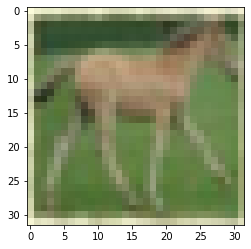

In [10]:
plt.imshow(X_test[2311])

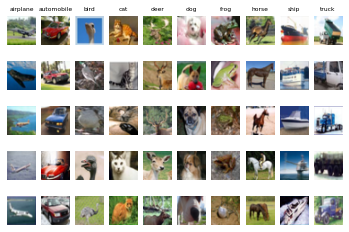

In [11]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples = 5

for y, cls in enumerate(classes):
    idxs = np.nonzero([i == y for i in y_train])
    idxs = np.random.choice(idxs[0], samples, replace=False)
    for i , idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
     
        plt.subplot(samples, num_classes, plt_idx)
        plt.imshow(X_train[idx])
        plt.axis("off")
        if i == 0:
            plt.title(cls,fontsize = 6)
        

plt.show()

Text(0.5, 1.0, 'Class distribution in training set')

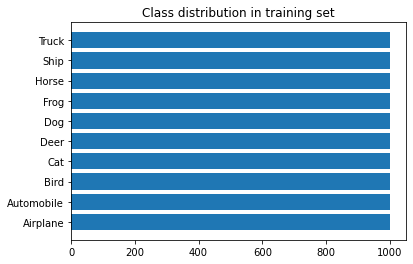

In [12]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

In [13]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(train_X)))
print("- Test-set:\t\t{}".format(len(test_X)))


Size of:
- Training-set:		50000
- Test-set:		10000


## Part 1. k-NN Classifier (2 Marks)
For this section you will implement a simple kNN Classifier on the Cifar10 dataset. To do this you will need to perform the following steps:
- Create a k-NN class. Your class must contain a method that returns predictions for your test set.
- Provide a suitable distance metric that you will use to calculate the nearest neightbours. You may choose the distance metric you believe is most suitable.
- Calculate the k nearest neighbours and make predictions.
- Choose the a value for _k_ that results in the highest accuracy on your test set. Show how you found this value.

When your classifier is working:
- Use sklearn to calculate accuracy and plot a confusion matrix using your predictions.
- Provide a brief discussion of your results

### Bonus:

When you compute the distance metric you can acheive better performance if you vectorize the computation instead of using for loops to iterate through the values. You can earn __0.5 bonus marks__ if you only need one loop, or __1 bonus mark__ if you can omit for loops for a fully vectorized distance calculation (a maximum of 1 bonus mark is available).




#### Import and read the Cifar10 data

In [14]:
from math import sqrt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import numpy as np
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import operator
from math import sqrt
from scipy import stats
import pandas as pd
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

In [15]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [16]:
X_test=X_test.reshape((-1,3072)) # reshape the testing data
X_train=X_train.reshape((-1,3072)) # reshape the training data

In [17]:
X_train.shape #present the shape of the train

(50000, 3072)

In [18]:
#take 20000 sample from the all training as it take much time to run ,but we take the all testing data
X_test= X_test[:1000]
X_train= X_train[:5000]
y_test=y_test[:1000]
y_train=y_train[:5000]

In [19]:
X_train.shape  

(5000, 3072)

####KNN class from scratch

In [20]:
class KNeighborsClassifier():

    def __init__(self, k=3):
        self.k = k
      
    
    # Euclidean distance
    def euclidean_distance(self, v1, v2):
        return np.sqrt(np.sum((v1-v2)**2))
  
        
    # Fitting
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    # Make predictions
    def predict(self, X_test):
        preds = []
        for test_point in X_test:
            _neighbours = self.get_neighbours(test_point)
            mode = stats.mode(_neighbours)[0][0]
            preds.append(mode)
        return np.array(preds)
        
        # Get nearest neighbours
    def get_neighbours(self, test_point):
        distances = list()
        for (train_row, train_class) in zip(self.X_train, self.y_train):   
            dist = self.euclidean_distance(train_row, test_point)
            distances.append((dist, train_class))
    
        distances.sort(key=lambda x: x[0])
        neighbours = list()
        for i in range(self.k):
            neighbours.append(distances[i][1])
            
        return neighbours

####KNN model with best K

In [21]:
#search about the best k from range 1 to 10 to get the highest accuracy

accuracy_list=[] 
ktiem=[]
for i in range(1,10):
    KNN_model= KNeighborsClassifier(i)
    KNN_model.fit(X_train, y_train)
    pred = KNN_model.predict(X_test)
    acc=accuracy_score(y_test,pred)*100
    print(f'for K = {i},accuracy: {accuracy_score(y_test,pred)*100:.1f} %') #accuracy using sklearn accuracy_score()
    accuracy_list.append(acc)
    ktiem.append(i)


for K = 1,accuracy: 17.9 %
for K = 2,accuracy: 16.6 %
for K = 3,accuracy: 18.8 %
for K = 4,accuracy: 19.6 %
for K = 5,accuracy: 19.2 %
for K = 6,accuracy: 19.9 %
for K = 7,accuracy: 19.1 %
for K = 8,accuracy: 19.6 %
for K = 9,accuracy: 20.1 %


In [22]:
all_Models=[]
all_Accuracy=[]
all_Models.extend(['k1','k2','K3','K4','K5','K6','K7','K8','K9'])
all_Accuracy.extend(accuracy_list)

print(all_Accuracy)
print(all_Models)

[17.9, 16.6, 18.8, 19.6, 19.2, 19.900000000000002, 19.1, 19.6, 20.1]
['k1', 'k2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9']


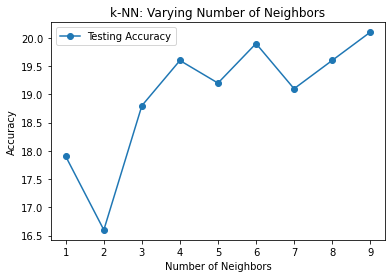

In [23]:
plt.title('k-NN: Varying Number of Neighbors')
neighbors = np.arange(1, len(accuracy_list)+1)
plt.plot(neighbors, accuracy_list, label = 'Testing Accuracy', marker='o')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [24]:
#KNN accuracies in dataframe with the K
dic_knn = {
    'K': ktiem,
    'Accuracy': accuracy_list 
    }
knn_accuracies = pd.DataFrame.from_dict(dic_knn)

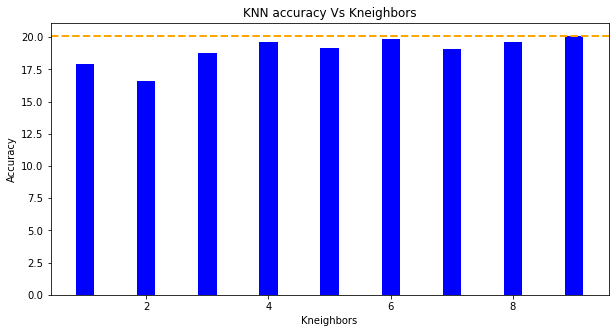

In [25]:

fig, ax = plt.subplots(figsize =(10, 5))
plt.bar(ktiem, accuracy_list, color ='b',
        width = 0.3)

 
plt.axhline(y=knn_accuracies.Accuracy.max(),linewidth=2,linestyle ="--", color='orange')
 
plt.xlabel("Kneighbors")
plt.ylabel("Accuracy")
plt.title("KNN accuracy Vs Kneighbors")
plt.show()

In [26]:
best_Kneighbors = knn_accuracies.loc[knn_accuracies['Accuracy'] == knn_accuracies.Accuracy.max(), 'K'].iat[0] #get the best k dynamic from the accuracy dataframe

#### The best KNN model 

In [27]:
#after training the model, now we will get the best model with high accuracy and plot the confusion matrix
KNN_model= KNeighborsClassifier(best_Kneighbors)
KNN_model.fit(X_train, y_train)
pred = KNN_model.predict(X_test)
acc=accuracy_score(y_test,pred)*100
print(f'for best K = {best_Kneighbors}, Accuracy: {accuracy_score(y_test,pred)*100:.1f} %')

for best K = 9, Accuracy: 20.1 %


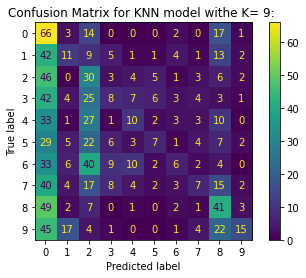

In [28]:
#confusion Matrix 
knn_cm = confusion_matrix(y_test, pred)
display = ConfusionMatrixDisplay(knn_cm ).plot()
plt.title(f"Confusion Matrix for KNN model withe K= {best_Kneighbors}: ")
plt.show()

## Part 2. Logistic Regression (3 Marks)

For this section you will perform binary classification using logistic regression. Just as in Part 1. you will use the Cifar10 dataset, however to obtain a result for each class using logistic regression you will need to use a One-vs-Rest (OvR) approach to acheive multi-class classification.

Using ```LogisticRegression()``` in sklearn, write a function to execute the OvR strategy for the Cifar10 classes. Do not use the built-in ```OneVsResClassifier()``` method. You will need to follow these basic steps:
- Train a binary classifier for each class, where the target class is a "positive" results and the combination of the remaining classes are "negative". For Cifar10 you will need 10 models.
- For each test sample compute the probabilities for each model
- Select the argmax of the probabilities to obtain the predicted class

Collect your predictions from the test set and compute the accuracy score and plot a confusion matrix.

#### Import and read The Cifar10 data

In [29]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from keras.datasets import cifar10


In [30]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [31]:
X_train=X_train.reshape((-1,3072))
X_test=X_test.reshape((-1,3072))

In [32]:
X_train.shape

(50000, 3072)

In [33]:
#take 20000 sample from the all training as it take much time to run ,but we take the all testing data
X_test= X_test[:1000]
X_train= X_train[:5000]
y_test=y_test[:1000]
y_train=y_train[:5000]

In [34]:
n_labels = len(np.unique(y_train))
n_labels

10

In [35]:
X_train.shape

(5000, 3072)

In [36]:
sub_model = LogisticRegression() 

####OVR LogisticRegegression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


OVR for class 0: accuracy = 9.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


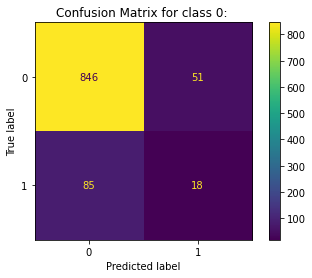

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


OVR for class 1: accuracy = 13.700000000000001


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


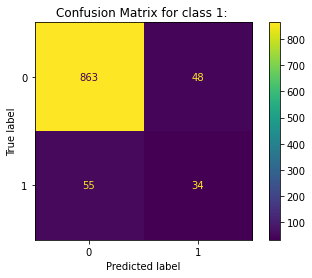

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


OVR for class 2: accuracy = 10.8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


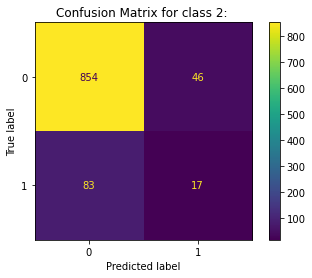

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


OVR for class 3: accuracy = 10.6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


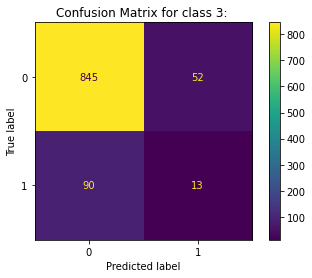

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


OVR for class 4: accuracy = 10.2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


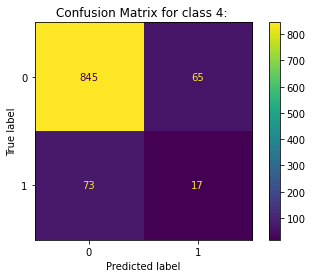

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


OVR for class 5: accuracy = 10.9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


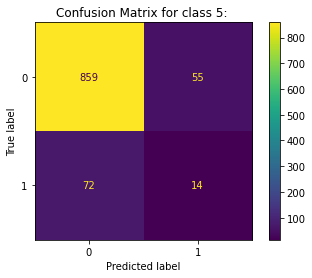

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


OVR for class 6: accuracy = 10.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


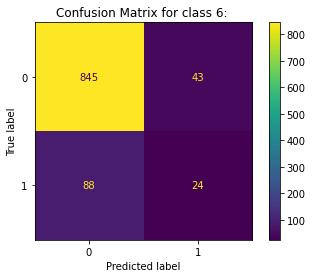

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


OVR for class 7: accuracy = 9.9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


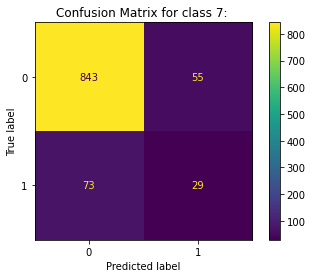

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


OVR for class 8: accuracy = 10.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


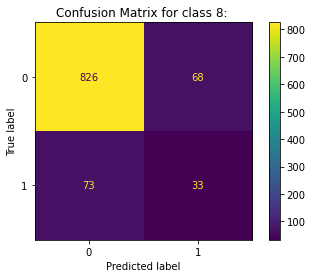

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


OVR for class 9: accuracy = 11.1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


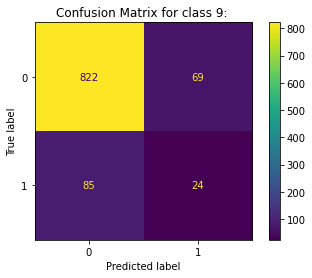

In [37]:
accuracy=[]
probalbilities=[]
for i in range(n_labels):

      # y_train_ovr = np.where(y_train == i, 1, 0)
     
      y_train_ovr = np.array([cls == i for cls in y_train]).astype(int) #one Hot Encoding for training : we focus on only one class which is meet the condition
      y_test_ovr = np.array([cls_ == i for cls_ in y_test]).astype(int) #one Hot Encoding for testing : we focus on only one class which is meet the condition

      sub_model.fit(X_train, y_train_ovr)
      lr_pred=sub_model.predict(X_test)
      lr_acc=accuracy_score(y_test,lr_pred)*100
      accuracy.append(lr_acc)
      print(f"OVR for class {i}: accuracy = {accuracy_score(y_test,lr_pred)*100 }")
      prob = sub_model.predict_proba(X_test)[:,1].reshape(-1,1) # get the probability for each model 
      probalbilities.append(prob)
      cm = confusion_matrix(y_test_ovr, lr_pred) # confuson matrix for each model
      display = ConfusionMatrixDisplay(cm,display_labels=sub_model.classes_ , ).plot()
      plt.title(f"Confusion Matrix for class {i}: ")
      plt.show()
      


In [38]:
for i in range(10):
  print(f"OVR for class {i}: accuracy = {accuracy[i]} %")

OVR for class 0: accuracy = 9.0 %
OVR for class 1: accuracy = 13.700000000000001 %
OVR for class 2: accuracy = 10.8 %
OVR for class 3: accuracy = 10.6 %
OVR for class 4: accuracy = 10.2 %
OVR for class 5: accuracy = 10.9 %
OVR for class 6: accuracy = 10.7 %
OVR for class 7: accuracy = 9.9 %
OVR for class 8: accuracy = 10.0 %
OVR for class 9: accuracy = 11.1 %


In [39]:
OVR_ls = {
    'class': [0,1,2,3,4,5,6,7,8,9],
    'Accuracy': accuracy
    }
OVR_accuracy = pd.DataFrame.from_dict(OVR_ls)


In [40]:


all_Models.extend(['class0','class2','class3','class4','class5','class6','class7','class8','class9'])
all_Accuracy.extend(accuracy_list)

print(all_Accuracy)
print(all_Models)


[17.9, 16.6, 18.8, 19.6, 19.2, 19.900000000000002, 19.1, 19.6, 20.1, 17.9, 16.6, 18.8, 19.6, 19.2, 19.900000000000002, 19.1, 19.6, 20.1]
['k1', 'k2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9', 'class0', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9']


In [41]:
OVR_accuracy

,class,Accuracy
0,0,9.0
1,1,13.7
2,2,10.8
3,3,10.6
4,4,10.2
5,5,10.9
6,6,10.7
7,7,9.9
8,8,10.0
9,9,11.1


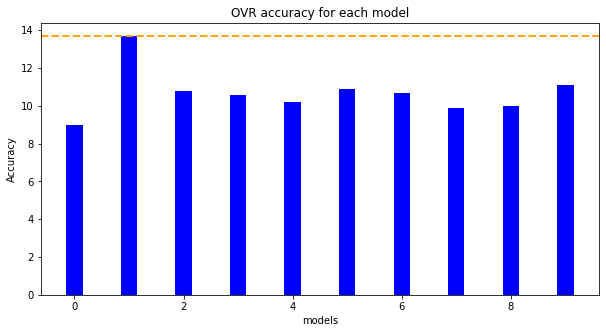

In [42]:
fig, ax = plt.subplots(figsize =(10, 5))
plt.bar([0,1,2,3,4,5,6,7,8,9], accuracy, color ='b',
        width = 0.3)

 
plt.axhline(y=OVR_accuracy.Accuracy.max(),linewidth=2,linestyle ="--", color='orange')
 
plt.xlabel("models")
plt.ylabel("Accuracy")
plt.title("OVR accuracy for each model")
plt.show()

#### Confusion Matrix for the predicted Class

Accuracy of predicted class : 28.10%


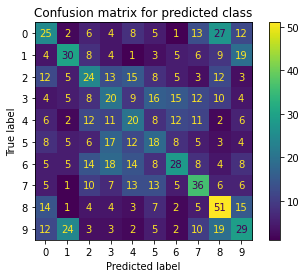

In [43]:
cls_prob= np.hstack((probalbilities))
winner = np.argmax(cls_prob , axis=1)
print('Accuracy of predicted class : {:.2f}%'.format(accuracy_score(y_test,winner)*100))
cm = confusion_matrix(y_test, winner)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion matrix for predicted class')
plt.show()

## Part 3. Support Vector Machine (SVM) Classification (4 Marks)

In Part 3. you will use Scikit-learn to perform classification, again on the Cifar10 dataset. You can use the built in SVM library for classification. As with logistic regression, SVM is designed for binary classification. However, in this case Scikit-learn will handle the OvR models behind the scenes.

Your task is to compare different modes of the SVM and determine the best performer. 

Create an SVM baseline using the <code>LinearSVC()</code> function. Make sure to use the primal solution and use "ovr" for multiclass Calculate the accuracy score for comparison.

Next you will explore the effect of the cost parameter on the accuracy.
    <ul>
    <li>Run the classification with a range of C values For example: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]</li>
    <li>Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

Add a regularization term.
    <ul>
    <li>Rerun the above experiment, but this time use L1 regularization.</li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

For the final experiment you will use the ```SVC()``` function to run the classifer with a kernel.
    <ul>
    <li>Use a radial basis function when training a new model</li>
    <li>Find the optimal combination of values for the cost and gamma parameters. Use the following values in your loop:<br/>
        <div style="margin-left:40px"><code>
        for cost in [0.01, 0.1, 1, 10, 100]:<br/>
        &emsp;for gamma in [0.01, 0.1, 1, 10, 100]:
        </code></div>
    </li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>


Choose the model with the highest accuracy and plot the confusion matrix. In your discussion explain the results of your experiments and the reason for increased performance from the baseline (if any). Comment on the effect of the cost-paramenter and the L1 penalty on accuracy as well as any overfitting you observed. Discuss the confusion matrix of the model accuracy and provide some reasons for high-values found off the main diagonal.

### Bonus Mark
Instead of using raw pixel values compute an alternate feature representation for your dataset and re-run train the model. Compare the accuracy of the model using the new feature representation with the model trained with pixel values.

####Import and read the data

In [44]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import seaborn
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [46]:
X_train=X_train.reshape((-1,3072))
X_test=X_test.reshape((-1,3072))

In [47]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
 
X_train=X_train/255
X_test=X_test/255

In [48]:
X_test= X_test[:1000]
X_train= X_train[:5000]
y_test=y_test[:1000]
y_train=y_train[:5000]

In [49]:
C_values=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
gamma= [0.01, 0.1, 1, 10, 100]

####Baseline Model LinearSVC()

In [50]:
baseline=LinearSVC(multi_class='ovr')
baseline.fit(X_train, y_train)
predict= baseline.predict(X_test)
Acc=accuracy_score(y_test,predict)*100

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [51]:
print(f'Baseline LinearSVC, accuracy: {Acc:.1f} %')

Baseline LinearSVC, accuracy: 24.4 %



#### LinearSVC with different values For C parameter



In [52]:
all_Models.extend(['Baseline'])
all_Accuracy.extend([Acc])

print(all_Accuracy)
print(all_Models)


[17.9, 16.6, 18.8, 19.6, 19.2, 19.900000000000002, 19.1, 19.6, 20.1, 17.9, 16.6, 18.8, 19.6, 19.2, 19.900000000000002, 19.1, 19.6, 20.1, 24.4]
['k1', 'k2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9', 'class0', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9', 'Baseline']


In [53]:
svc_C=[]
for c , cost in enumerate([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]):
  model=LinearSVC(C=cost,multi_class='ovr')
  model.fit(X_train, y_train)
  predict= model.predict(X_test)
  accuracy=accuracy_score(y_test,predict)*100
  svc_C.append(accuracy)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

In [54]:
svm_c = {
    'C': C_values,
    'Accuracy': svc_C 
    }
svc_accuracies = pd.DataFrame.from_dict(svm_c)

In [55]:
svc_accuracies

,C,Accuracy
0,0.0001,36.5
1,0.0010,35.4
2,0.0100,33.7
3,0.1000,29.1
4,1.0000,24.9
5,10.0000,22.3
6,100.0000,23.3
7,1000.0000,23.2


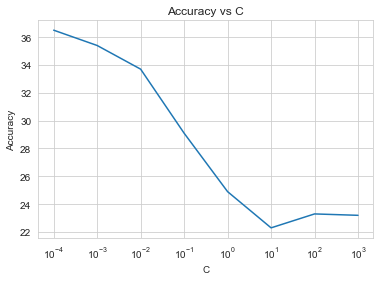

In [56]:
seaborn.set_style("whitegrid")
figure = plt.figure()
axe = figure.gca()
line = plt.plot(C_values, svc_C, axes=axe)
title = axe.set_title("Accuracy vs C")
label = axe.set_ylabel("Accuracy")
labels = axe.set_ylabel("Accuracy")
labels = axe.set_xlabel("C")
axe.set_xscale('log')

In [57]:
all_Models.extend(['Cost1','Cost2','Cost3','Cost4','Cost5','Cost6','Cost7','Cost8'])
all_Accuracy.extend(svc_C)

print(all_Accuracy)


[17.9, 16.6, 18.8, 19.6, 19.2, 19.900000000000002, 19.1, 19.6, 20.1, 17.9, 16.6, 18.8, 19.6, 19.2, 19.900000000000002, 19.1, 19.6, 20.1, 24.4, 36.5, 35.4, 33.7, 29.099999999999998, 24.9, 22.3, 23.3, 23.200000000000003]


####SVC with C & L1 regularization 

In [58]:
svm_C_L1=[]
for c , cost in enumerate([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]):
  SVM_L1=LinearSVC(multi_class='ovr',C=cost, penalty='l1',dual=False)
  SVM_L1.fit(X_train, y_train)
  predict= SVM_L1.predict(X_test)
  acc_l1=accuracy_score(y_test,predict)*100
  svm_C_L1.append(acc_l1)
  print(cost)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.0001


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.001


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.01


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


100
1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [59]:
svc_L1 = {
    'C': C_values,
    'Penalty': 'L1',
    'Accuracy': svm_C_L1 
    }
svc_accuracies_l1 = pd.DataFrame.from_dict(svc_L1)

In [60]:
svc_accuracies_l1

,C,Penalty,Accuracy
0,0.0001,L1,10.3
1,0.0010,L1,10.6
2,0.0100,L1,30.7
3,0.1000,L1,36.3
4,1.0000,L1,26.1
5,10.0000,L1,24.1
6,100.0000,L1,23.3
7,1000.0000,L1,23.2


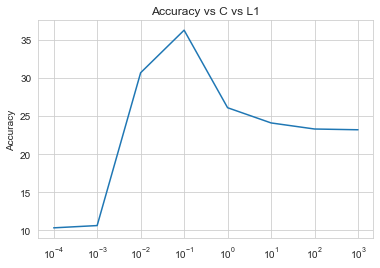

In [61]:
seaborn.set_style("whitegrid")
figure = plt.figure()
axe = figure.gca()
line = plt.plot(C_values, svm_C_L1, axes=axe)
title = axe.set_title("Accuracy vs C vs L1")
label = axe.set_ylabel("Accuracy")
labels = axe.set_ylabel("Accuracy")
axe.set_xscale('log')

In [62]:
all_Models.extend(['C1-L1','C2-L1','C3-L1','C4-L1','C5-L1','C6-L1','C7-L1','C8-L1'])
all_Accuracy.extend(svm_C_L1)

print(all_Accuracy)
print(all_Models)


[17.9, 16.6, 18.8, 19.6, 19.2, 19.900000000000002, 19.1, 19.6, 20.1, 17.9, 16.6, 18.8, 19.6, 19.2, 19.900000000000002, 19.1, 19.6, 20.1, 24.4, 36.5, 35.4, 33.7, 29.099999999999998, 24.9, 22.3, 23.3, 23.200000000000003, 10.299999999999999, 10.6, 30.7, 36.3, 26.1, 24.099999999999998, 23.3, 23.200000000000003]
['k1', 'k2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9', 'class0', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9', 'Baseline', 'Cost1', 'Cost2', 'Cost3', 'Cost4', 'Cost5', 'Cost6', 'Cost7', 'Cost8', 'C1-L1', 'C2-L1', 'C3-L1', 'C4-L1', 'C5-L1', 'C6-L1', 'C7-L1', 'C8-L1']


####SVC with rbf kernal

In [63]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred_svc = svclassifier.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC with rbf kernal, accuracy: 42.3 %


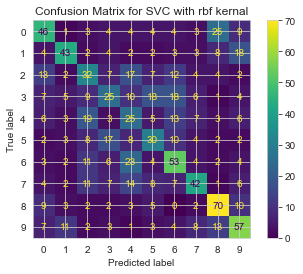

In [64]:
svc_cm=confusion_matrix(y_test,y_pred_svc)
display = ConfusionMatrixDisplay(svc_cm,display_labels=svclassifier.classes_ , ).plot()
print(f'SVC with rbf kernal, accuracy: {accuracy_score(y_test,y_pred_svc)*100:.1f} %')
plt.title(f"Confusion Matrix for SVC with rbf kernal")
plt.show()


In [65]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.46      0.45      0.45       103
           1       0.57      0.48      0.52        89
           2       0.32      0.32      0.32       100
           3       0.32      0.24      0.28       103
           4       0.23      0.28      0.25        90
           5       0.35      0.35      0.35        86
           6       0.43      0.47      0.45       112
           7       0.51      0.41      0.45       102
           8       0.54      0.66      0.60       106
           9       0.48      0.52      0.50       109

    accuracy                           0.42      1000
   macro avg       0.42      0.42      0.42      1000
weighted avg       0.42      0.42      0.42      1000



In [66]:
rbf_acc=accuracy_score(y_test,y_pred_svc)*100
rbf_acc

42.3

In [67]:

all_Models.extend(['kernal_rbf'])
all_Accuracy.extend([rbf_acc])

print(all_Accuracy)
print(all_Models)
print(len(all_Accuracy))
print(len(all_Models))

[17.9, 16.6, 18.8, 19.6, 19.2, 19.900000000000002, 19.1, 19.6, 20.1, 17.9, 16.6, 18.8, 19.6, 19.2, 19.900000000000002, 19.1, 19.6, 20.1, 24.4, 36.5, 35.4, 33.7, 29.099999999999998, 24.9, 22.3, 23.3, 23.200000000000003, 10.299999999999999, 10.6, 30.7, 36.3, 26.1, 24.099999999999998, 23.3, 23.200000000000003, 42.3]
['k1', 'k2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9', 'class0', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9', 'Baseline', 'Cost1', 'Cost2', 'Cost3', 'Cost4', 'Cost5', 'Cost6', 'Cost7', 'Cost8', 'C1-L1', 'C2-L1', 'C3-L1', 'C4-L1', 'C5-L1', 'C6-L1', 'C7-L1', 'C8-L1', 'kernal_rbf']
36
36


In [68]:
gamma = [0.01, 0.1, 1, 10, 100]
C_values=[0.01, 0.1, 1, 10, 100]

In [69]:
C_gamma=np.zeros((5,5))
C_gamma = C_gamma.astype(np.float)
c_gamma_acc=[]
best_C=0
best_gamma=0
highest_acc=0
for c, cost  in enumerate([0.01, 0.1, 1, 10, 100]):
    for g , gamma in enumerate([0.01, 0.1, 1, 10, 100]):
        clf4 = SVC(kernel='rbf',C=cost , gamma=gamma)
        clf4.fit(X_train, y_train)
        p=clf4.predict(X_test)
        acc_gamma=accuracy_score(y_test,p)*100
        c_gamma_acc.append(acc_gamma)
        print(f"SVC for C: {cost} with gamma: {gamma}, The Accuracy = {acc_gamma }%")
        C_gamma[c,g]=acc_gamma
        if acc_gamma > highest_acc:
          highest_acc=acc_gamma
          best_C= cost
          best_gamma=gamma

                

C:\Users\Nada\AppData\Local\Temp/ipykernel_7768/2603456999.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_gamma = C_gamma.astype(np.float)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 0.01 with gamma: 0.01, The Accuracy = 16.5%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 0.01 with gamma: 0.1, The Accuracy = 10.6%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 0.01 with gamma: 1, The Accuracy = 10.6%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 0.01 with gamma: 10, The Accuracy = 10.6%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 0.01 with gamma: 100, The Accuracy = 10.6%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 0.1 with gamma: 0.01, The Accuracy = 32.800000000000004%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 0.1 with gamma: 0.1, The Accuracy = 10.6%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 0.1 with gamma: 1, The Accuracy = 10.6%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 0.1 with gamma: 10, The Accuracy = 10.6%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 0.1 with gamma: 100, The Accuracy = 10.6%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 1 with gamma: 0.01, The Accuracy = 44.4%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 1 with gamma: 0.1, The Accuracy = 16.0%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 1 with gamma: 1, The Accuracy = 10.6%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 1 with gamma: 10, The Accuracy = 10.6%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 1 with gamma: 100, The Accuracy = 10.6%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 10 with gamma: 0.01, The Accuracy = 44.3%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 10 with gamma: 0.1, The Accuracy = 16.0%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 10 with gamma: 1, The Accuracy = 10.6%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 10 with gamma: 10, The Accuracy = 10.6%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 10 with gamma: 100, The Accuracy = 10.6%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 100 with gamma: 0.01, The Accuracy = 44.6%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 100 with gamma: 0.1, The Accuracy = 16.0%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 100 with gamma: 1, The Accuracy = 10.6%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 100 with gamma: 10, The Accuracy = 10.6%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC for C: 100 with gamma: 100, The Accuracy = 10.6%


In [78]:
highest_acc

44.6

In [79]:
C_gamma

array([[16.5, 10.6, 10.6, 10.6, 10.6],
       [32.8, 10.6, 10.6, 10.6, 10.6],
       [44.4, 16. , 10.6, 10.6, 10.6],
       [44.3, 16. , 10.6, 10.6, 10.6],
       [44.6, 16. , 10.6, 10.6, 10.6]])

In [80]:
len(c_gamma_acc)

25

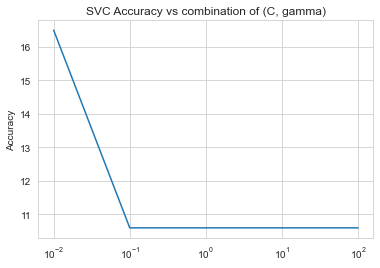

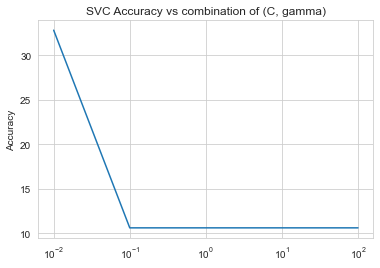

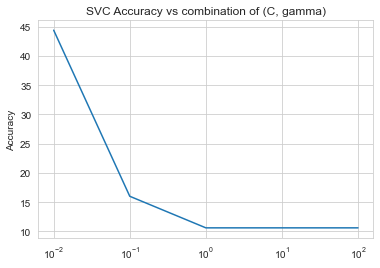

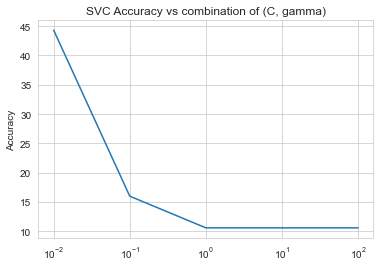

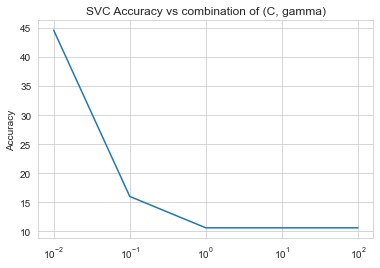

In [81]:
for z in range(0,5):
  seaborn.set_style("whitegrid")
  figure = plt.figure()
  axe = figure.gca()
  line = plt.plot(C_values, C_gamma[z], axes=axe)
  title = axe.set_title("SVC Accuracy vs combination of (C, gamma)")
  label = axe.set_ylabel("C")
  labels = axe.set_ylabel("Accuracy")
  axe.set_xscale('log')


In [82]:
all_Models.extend(['c1-g1','c1g2','c1g3','c1g4','c1g5',
                   'c2-g1','c2-g2','c2-g3','c2-g4','c2-g5',
                  'c3-g1','c3-g2','c3-g3','c3-g4','c3-g5',
                   'c4-g1','c4-g2','c4-g3','c4-g4','c4-g5'
                  'c5-g1','c5-g2','c5-g3','c5-g4','c5-g5','cf'])
all_Accuracy.extend(c_gamma_acc)

print(all_Accuracy)
print(len(all_Models))
print(len(all_Accuracy))

[17.9, 16.6, 18.8, 19.6, 19.2, 19.900000000000002, 19.1, 19.6, 20.1, 17.9, 16.6, 18.8, 19.6, 19.2, 19.900000000000002, 19.1, 19.6, 20.1, 24.4, 36.5, 35.4, 33.7, 29.099999999999998, 24.9, 22.3, 23.3, 23.200000000000003, 10.299999999999999, 10.6, 30.7, 36.3, 26.1, 24.099999999999998, 23.3, 23.200000000000003, 42.3, 16.5, 10.6, 10.6, 10.6, 10.6, 32.800000000000004, 10.6, 10.6, 10.6, 10.6, 44.4, 16.0, 10.6, 10.6, 10.6, 44.3, 16.0, 10.6, 10.6, 10.6, 44.6, 16.0, 10.6, 10.6, 10.6, 16.5, 10.6, 10.6, 10.6, 10.6, 32.800000000000004, 10.6, 10.6, 10.6, 10.6, 44.4, 16.0, 10.6, 10.6, 10.6, 44.3, 16.0, 10.6, 10.6, 10.6, 44.6, 16.0, 10.6, 10.6, 10.6]
86
86


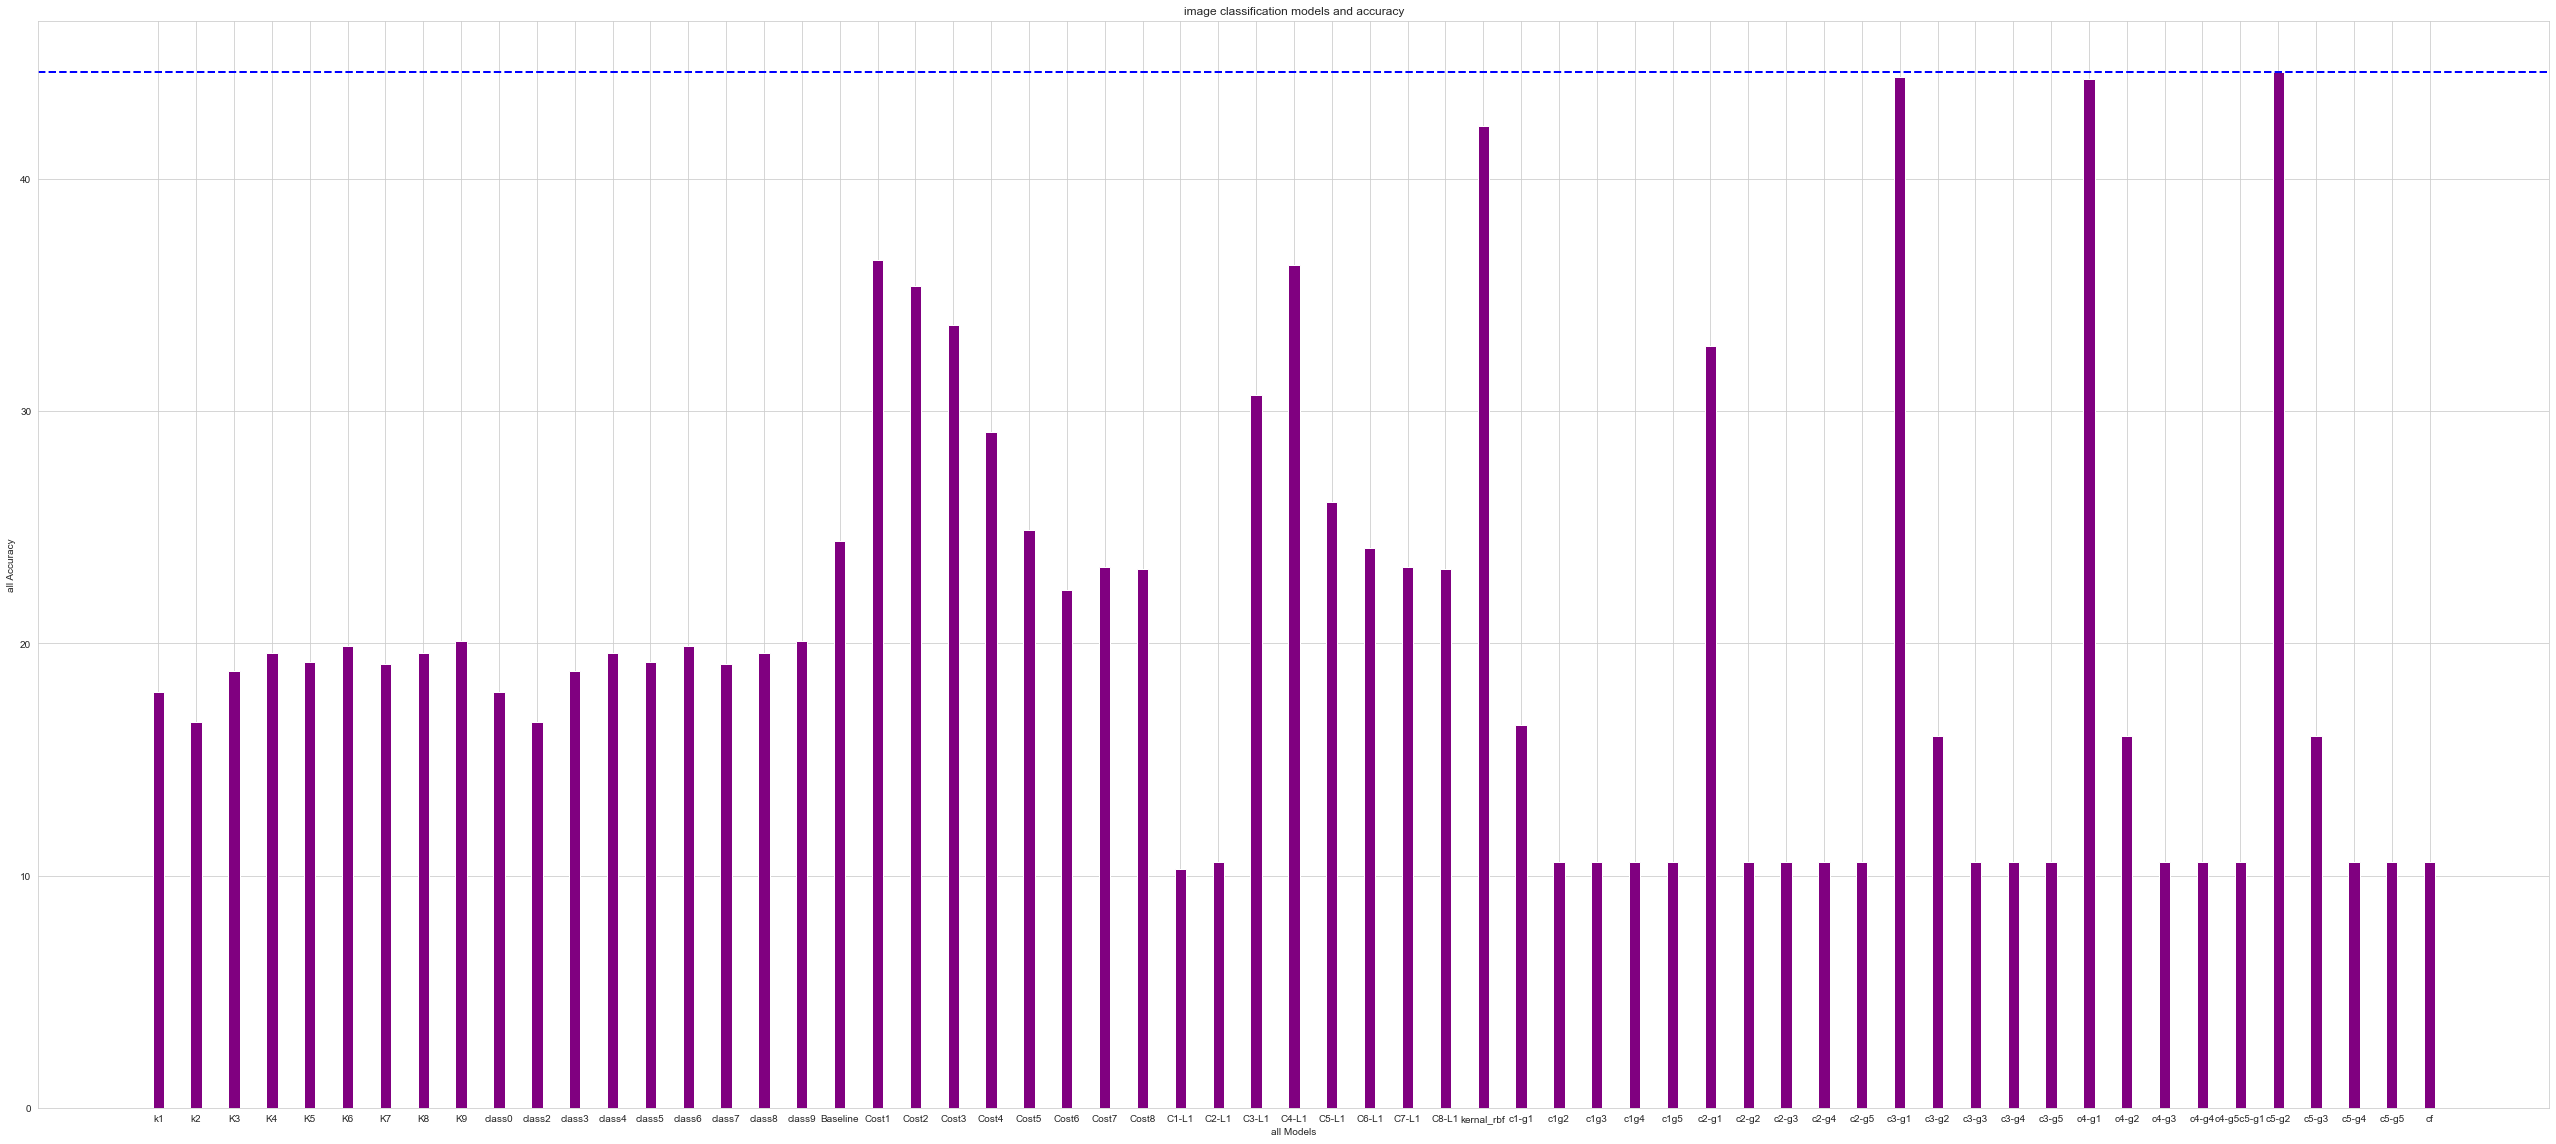

In [88]:
fig, ax = plt.subplots(figsize =(45, 20))
plt.bar(all_Models,all_Accuracy , color ='purple',
        width = 0.3)

 
plt.axhline(y=max(all_Accuracy),linewidth=2,linestyle ="--", color='blue')
 
plt.xlabel("all Models")
plt.ylabel("all Accuracy")
plt.title("image classification models and accuracy")
plt.show()

####The champoin model with highest accuracy 

In [97]:
champion = SVC(kernel='rbf',C=100 , gamma=0.01)
champion.fit(X_train, y_train)
p=champion.predict(X_test)
acc_gamma=accuracy_score(y_test,p)*100


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [98]:
acc_gamma

44.6

SVC for C: 100 with gamma: 0.01, The Accuracy: 44.6 %


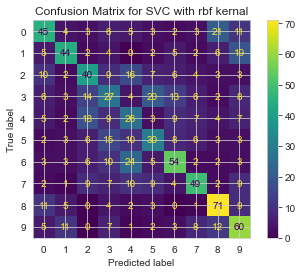

In [101]:
champoin_cm=confusion_matrix(y_test,p)
display = ConfusionMatrixDisplay(svc_cm,display_labels=champion.classes_ , ).plot()
print(f'SVC for C: 100 with gamma: 0.01, The Accuracy: {acc_gamma:.1f} %')
plt.title(f"Confusion Matrix for SVC with rbf kernal")
plt.show()


## Part 4. Write a Conclusion (1 Mark)

*   Part1 KNN Classifier


> Because of the processing complexity and the lack of efficient computational hardware and time, we trained the model on 5000 data samples and tested it on 1000 samples.
After building the model we searched for the best K neighbors in the range 1 to 10 that gave us the best accuracy after hit and trail we discovered that  1 k is the best with 21.1% accuracy.


*   Part 3: Logistic Regression

> We had 10 models, one for each class on the train. The LR provides Accuracy of Predicted Class: 36.46%, also trained the model on 20000 samples and test on 10000 samples

*  Part 3, first,  SVCLeaner() base model, which gave us a 23.5% accuracy.


> •	Then we looked at the effect of C cost on SVC accuracy. We looked at the cost in [0.01, 0.1, 1, 10, 100] and found that the best accuracy is 36.5% with a cost of 0.0001.


> •	Then we applied the Regularization technique using Ridge L1 regressor with the cost to know its effect on the performance of the model, we discover that cost 1 with L1 gave us the highest accuracy 36.9%.


> •	Then, when building the SVC, we used the RBF kernel, which gave us 42.3% accuracy.


>• The Last tuning is the search for the best combination of Cost equal to 100 and gamma equal to 0.01 which gave us 44.6% accuracy

>• According to the above hyperparameters, we found out that the champion model with highest accuracy SVC for C: 100 with gamma: 0.01, The Accuracy = 44.6%


















<!-- Write your conclusion here -->